# **Image processing with Python, NumPy (read, process, save)**
---

**Author:** https://github.com/nkmk

**Adapted by:** https://github.com/maups/

By storing the images read by Pillow(PIL) as a NumPy array ndarray, various image processing can be performed using NumPy functions.

By the operation of ndarray, acquisition and rewriting of pixel values, trimming by slice, concatenating can be done. Those who are used to NumPy can do a lot of things without using libraries such as OpenCV.

Even when using OpenCV, Python's OpenCV treats image data as ndarray, so it is useful to remember the processing in NumPy (ndarray).

Here, the following contents will be described.

Read and write images:

*   How to read image file as NumPy array ndarray
*   How to save NumPy array ndarray as image file

Examples of image processing with NumPy (ndarray):

*   Generation of single color image and concatenation
*   Negative / positive inversion (inversion of pixel value)
*   Color reduction
*   Binarization
*   Gamma correction
*   Trimming with slice
*   Paste with slice

# **How to read an image file as ndarray**
---

Pass the image data read by PIL.Image.open() to np.array() to obtain ndarray.

RGB (color) images become 3D ndarray (row (height) x column (width) x color (3)), black and white (grayscale) images become 2D ndarray (row (height) x column (width)).

Pixel type: uint8
Number of dimensions: 3
Image size: (540, 720, 3)


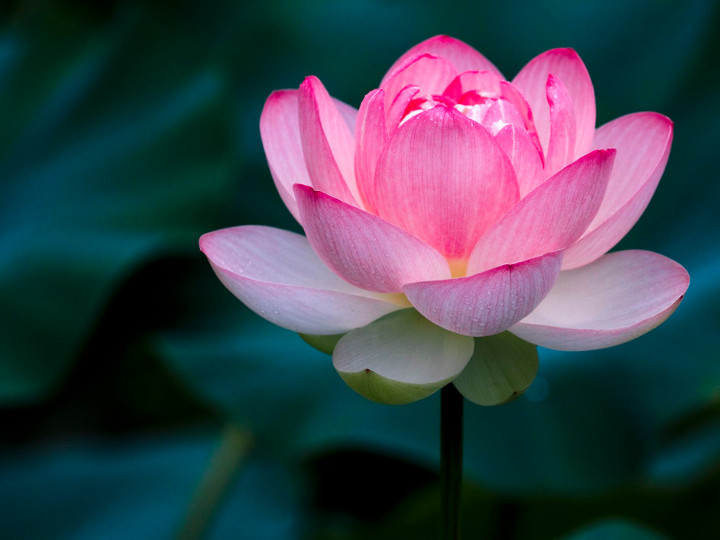

In [ ]:
from PIL import Image
import numpy as np

pil_img = Image.open('image.jpg')
im = np.array(pil_img)

print('Pixel type:', im.dtype)
print('Number of dimensions:', im.ndim)
print('Image size:', im.shape)

pil_img

When converting from PIL.Image to ndarray, the color order is RGB (red, green,blue). Note that this is different from when reading image files with OpenCV (BGR).

If you want to calculate with decimal point for image data, read in float.

In [ ]:
im_f = np.array(Image.open('image.jpg'), np.float)

print(im_f.dtype)

float64


Because it is ndarray, acquisition of pixel value is easy. The origin (0, 0) is the upper left of the image. Of course, methods such as min() and max() can be used as they are.

In the following example, the pixel value [R, G, B] at the position of (x, y) = (256, 256) and the minimum value of R are acquired.

In [ ]:
print(im[256, 256])

print(im[:, :, 0].min())

[174 151 193]
0


Examples of other processes are described later.

# **How to save ndarray as image file**
---

Pass ndarray to Image.fromarray() to obtain PIL.Image.

PIL.Image can be saved as an image file with save().

In [ ]:
pil_img = Image.fromarray(im)
pil_img.save('image_save.jpg')

You can write it in one line.

In [ ]:
Image.fromarray(im).save('image_save.jpg')

If the data type dtype of ndarray is float etc., convert it to uint8 (unsigned 8-bit integer) to save it as JPG or PNG.

In [ ]:
pil_img_f = Image.fromarray(im_f.astype(np.uint8))
pil_img_f.save('image_save.jpg')

Note that if the pixel value is represented by 0.0 to 1.0, it is necessary to multiply by 255 and convert to uint8 and save.

# **Generation of single color image and concatenation**
---

Generate single-color images by setting other color values to 0, and concatenate them horizontally with np.concatenate(). You can also concatenate images using np.hstack() or np.c_[]

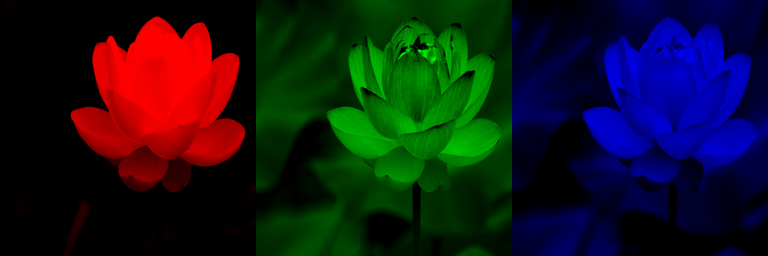

In [ ]:
im = np.array(Image.open('image.jpg').resize((256, 256)))

im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
# im_RGB = np.hstack((im_R, im_G, im_B))
# im_RGB = np.c_['1', im_R, im_G, im_B]
Image.fromarray(im_RGB)

# **Negative / positive inversion (invert pixel value)**
---

It is also easy to calculate and process pixel values.

A negative-positive inverted image can be generated by subtracting the pixel value from the max value (255 for uint8).

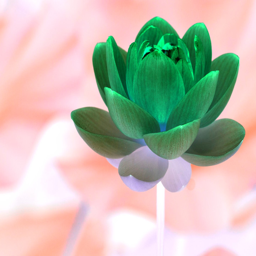

In [ ]:
im = np.array(Image.open('image.jpg').resize((256, 256)))

im_i = 255 - im

Image.fromarray(im_i)

# **Color reduction**
---

Cut off the remainder of the division using // and multiply again, the pixel values become discrete values and the number of colors can be reduced.

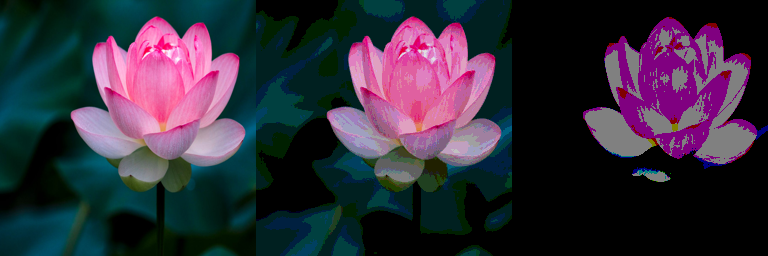

In [ ]:
im = np.array(Image.open('image.jpg').resize((256, 256)))

im_32 = im // 32 * 32
im_128 = im // 128 * 128

im_dec = np.concatenate((im, im_32, im_128), axis=1)
Image.fromarray(im_dec)

# **Binarization**
---

It is also possible to assign to black and white according to the threshold. First, convert the image to grayscale using Image.convert('L').

Then, using a comparison operator on the NumPy array ndarray yields a ndarray of Boolean values (True, False) as a result of comparison for each element (each pixel value in the case of an image).

True is considered as 1 and False as 0. When storing as an image, the pixel value of True is white and the pixel value of False is black by multiplying 255 (the max value of 'uint8`).

Pixel type: uint8
Number of dimensions: 2
Image size: (256, 256)


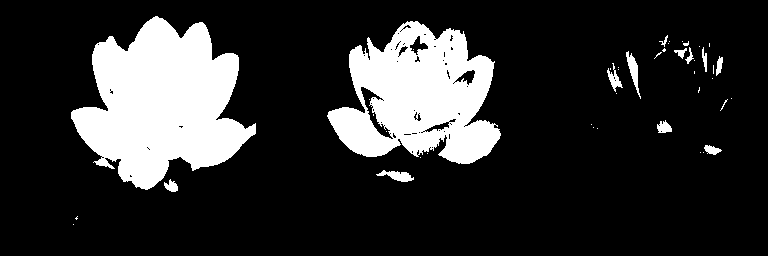

In [ ]:
im = np.array(Image.open('image.jpg').convert('L').resize((256, 256)))

print('Pixel type:', im.dtype)
print('Number of dimensions:', im.ndim)
print('Image size:', im.shape)

im_bin_192 = (im > 192) * 255
im_bin_128 = (im > 128) * 255
im_bin_64 = (im > 64) * 255

im_bin = np.concatenate((im_bin_64, im_bin_128, im_bin_192), axis=1)
Image.fromarray(np.uint8(im_bin))

# **Gamma correction**
---

You can do multiplication, division, exponentiation, anything.

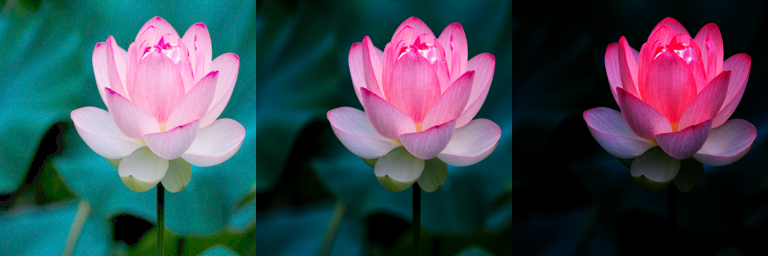

In [ ]:
im = np.array(Image.open('image.jpg').resize((256, 256)), np.float32)

im_1_22 = 255.0 * (im / 255.0)**(1 / 2.2)
im_22 = 255.0 * (im / 255.0)**2.2

im_gamma = np.concatenate((im_1_22, im, im_22), axis=1)
Image.fromarray(np.uint8(im_gamma))

# **Trimming with slice**
---

By specifying an area with slice, you can trim it to a rectangle.

(540, 720, 3)
(400, 400, 3)


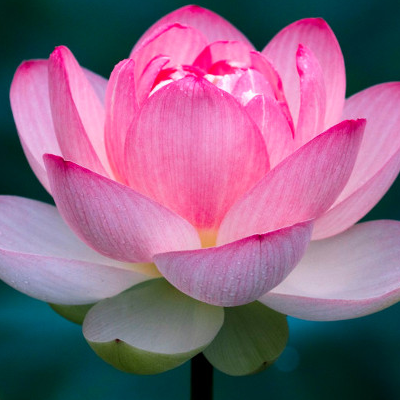

In [ ]:
im = np.array(Image.open('image.jpg'))

print(im.shape)

im_trim1 = im[30:430, 250:650]
print(im_trim1.shape)

Image.fromarray(im_trim1)

It may be convenient to define a function that specifies the upper left coordinates and the width and height of the area to be trimmed.

(400, 400, 3)


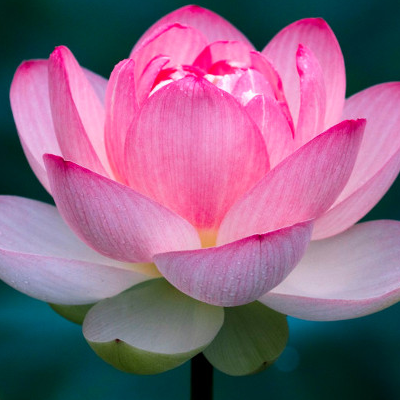

In [ ]:
def trim(array, x, y, width, height):
    return array[y:y + height, x:x+width]

im_trim2 = trim(im, 250, 30, 400, 400)
print(im_trim2.shape)

Image.fromarray(im_trim2)

If an area outside the size of the image is specified, it is ignored.

(400, 470, 3)


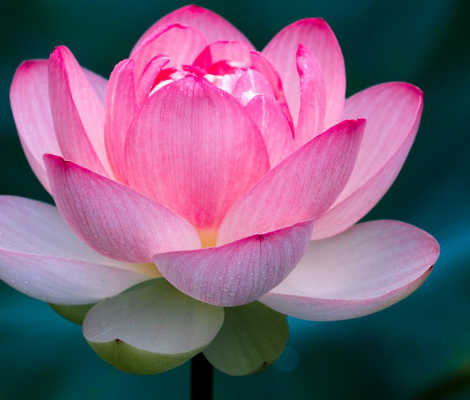

In [ ]:
im_trim3 = trim(im, 250, 30, 100000, 400)
print(im_trim3.shape)

Image.fromarray(im_trim3)

# **Paste with slice**
---

Using slices, one array rectangle can be replaced with another array rectangle.

By using this, a part of the image or the entire image can be pasted to another image.

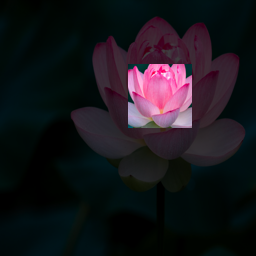

In [ ]:
src = np.array(Image.open('image.jpg').resize((128, 128)))
dst = np.array(Image.open('image.jpg').resize((256, 256))) // 4

dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[16:80, 48:112]

Image.fromarray(dst_copy)

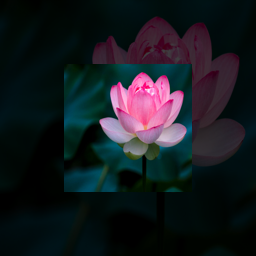

In [ ]:
dst_copy = dst.copy()
dst_copy[64:192, 64:192] = src

Image.fromarray(dst_copy)

Note that an error will occur if the size of the area specified on the left side differs from the size of the area specified on the right side.